In [1]:
!nvidia-smi

Sun Aug 27 09:19:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os


In [3]:
print(f"Tensorflow version {tf.__version__}")

Tensorflow version 2.12.0


In [4]:
print(f"Keras version {tf.keras.__version__}")

Keras version 2.12.0


# GPU/CPU Check

In [5]:
tf.config.list_logical_devices("GPU")

[LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [6]:
tf.config.list_logical_devices("CPU")

[LogicalDevice(name='/device:CPU:0', device_type='CPU')]

In [7]:
check_list = ["GPU","CPU"]

for device in check_list:
  out = tf.config.list_logical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU is available!
Details >> [LogicalDevice(name='/device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [LogicalDevice(name='/device:CPU:0', device_type='CPU')]


# Load MNIST Data

In [8]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [9]:
X_train_full #pixels values of each image

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
X_train_full[0] #pixels values of single image


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
y_train_full #labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
y_train_full[0]

5

In [13]:
X_train_full.shape

(60000, 28, 28)

In [14]:
y_train_full.shape

(60000,)

In [15]:
X_train_full.dtype

dtype('uint8')

In [16]:
y_train_full.dtype

dtype('uint8')

In [17]:
X_test.shape

(10000, 28, 28)

In [18]:
y_test.shape

(10000,)

<Axes: >

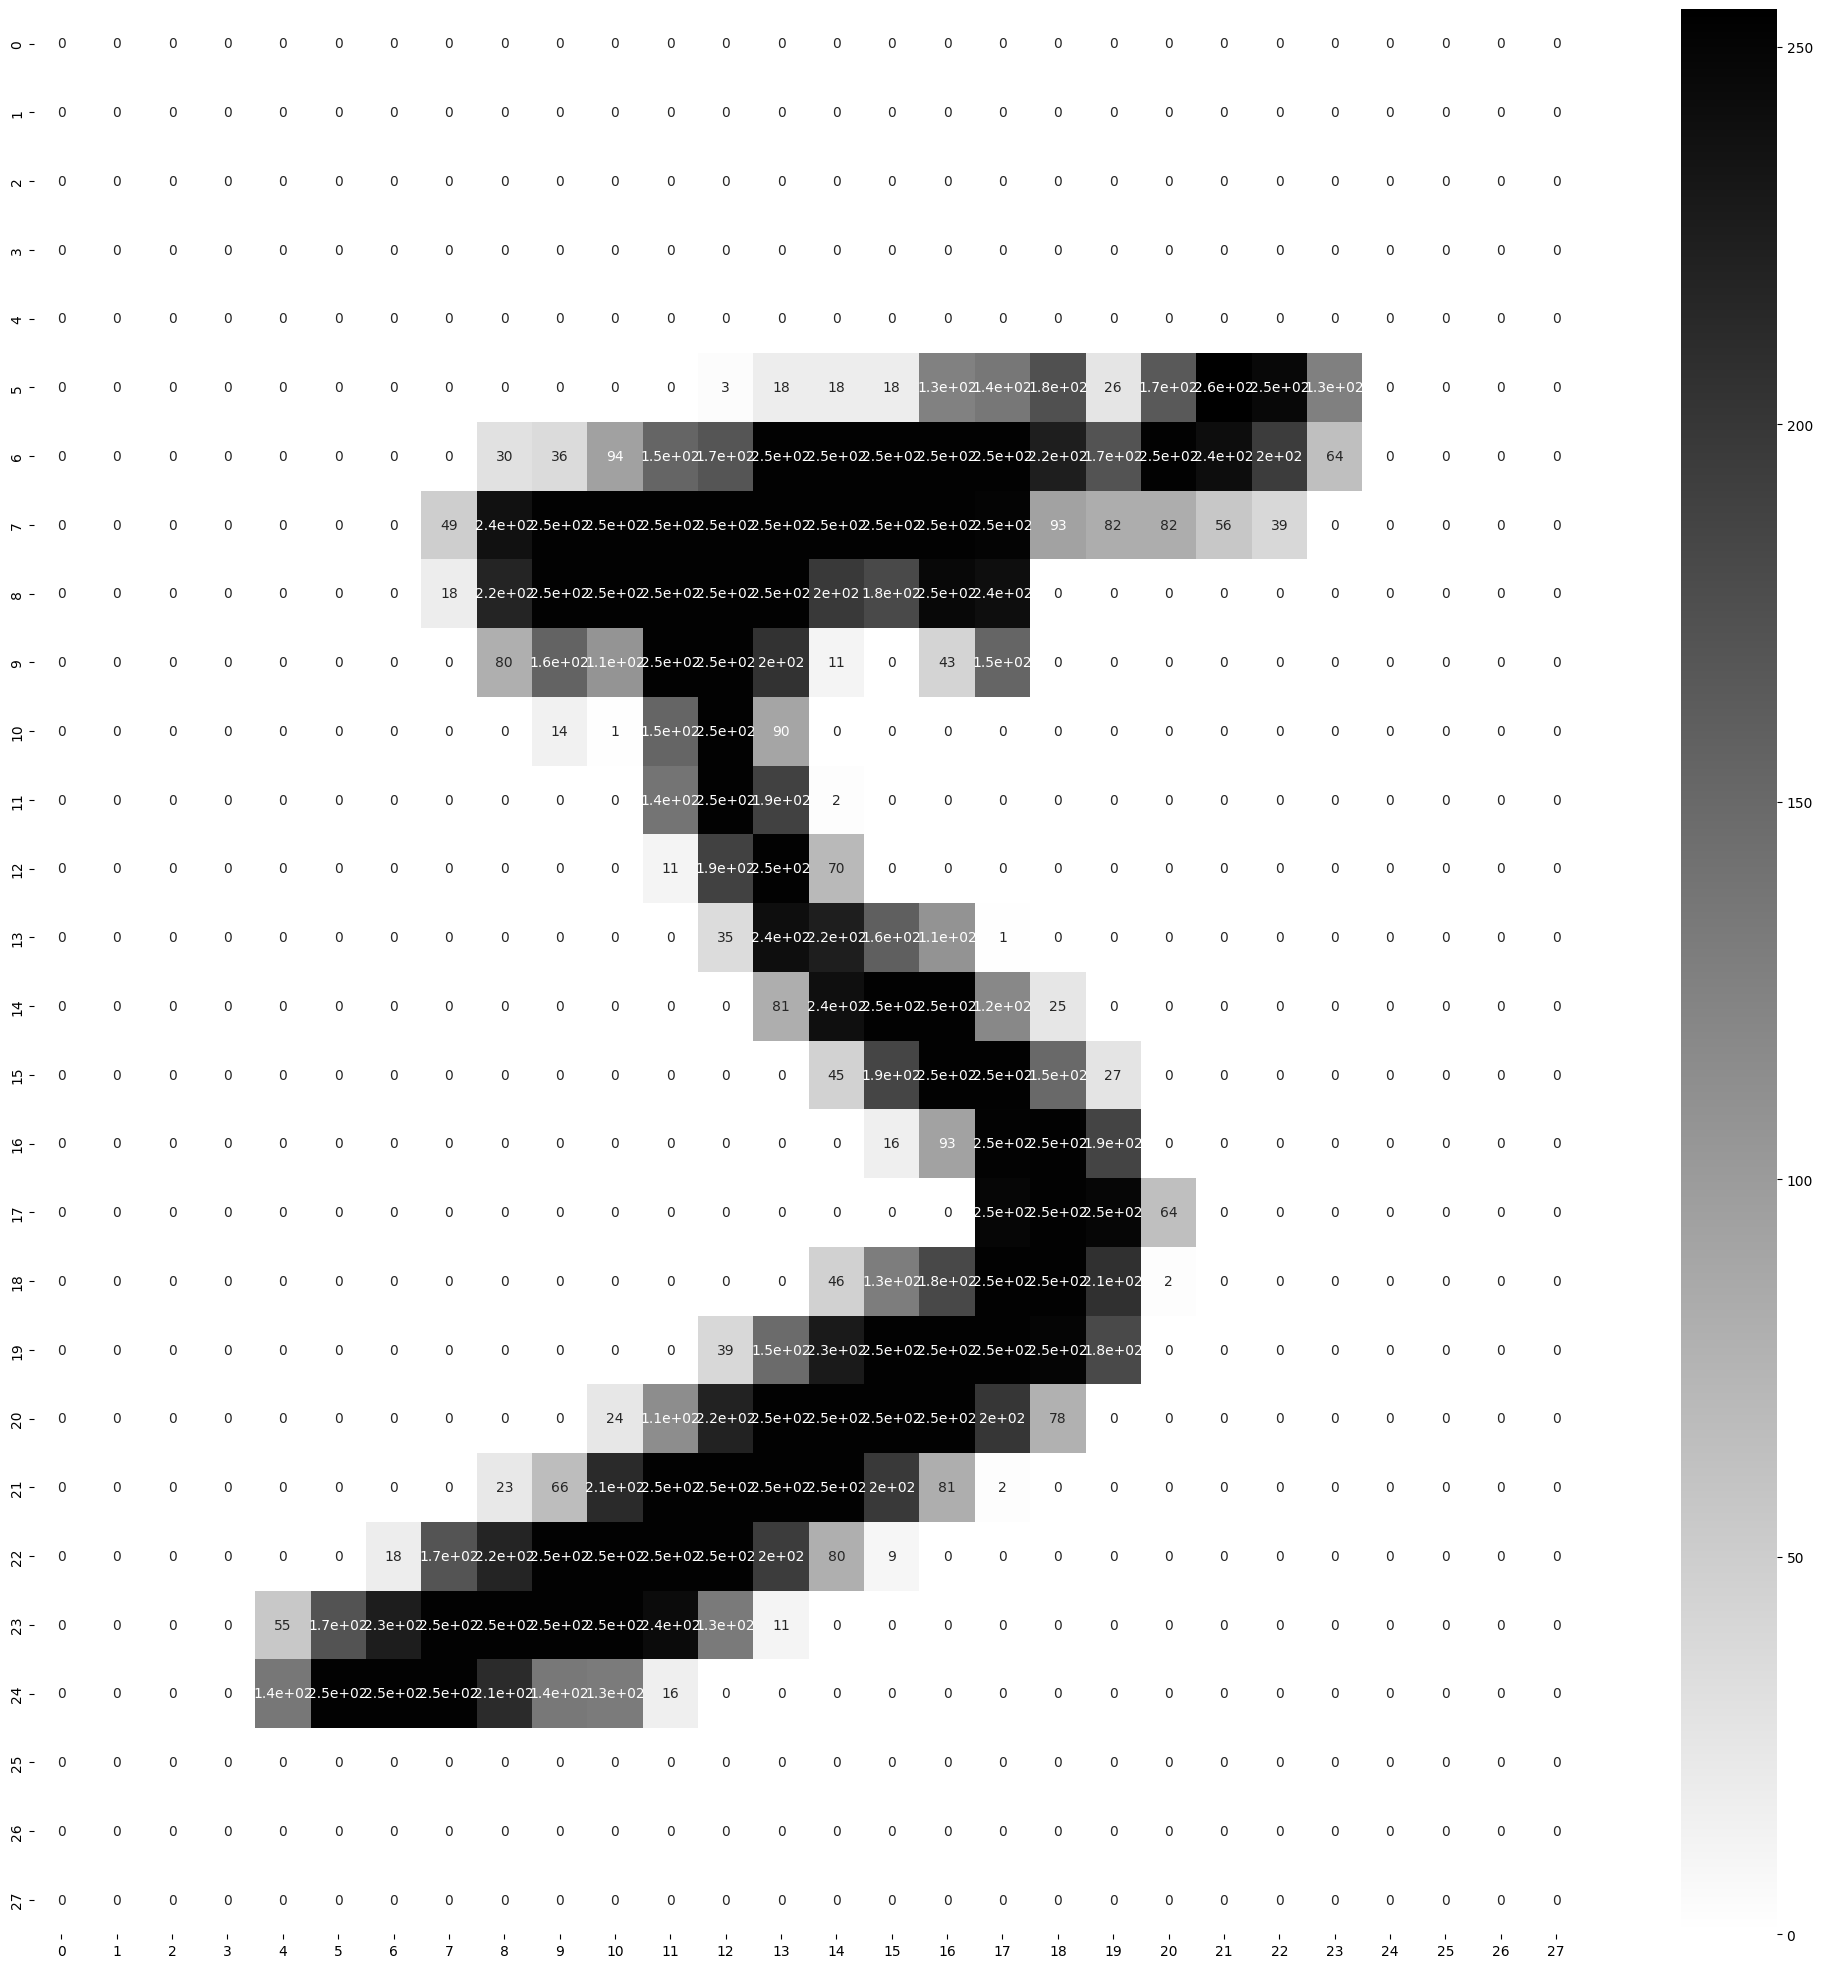

In [19]:
plt.figure(figsize=(25,25))
sns.heatmap(X_train_full[0],annot=True,cmap="binary")

In [20]:
# Applying scaling (minmax)

In [21]:
X_valid,X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

In [22]:
X_train.shape

(55000, 28, 28)

In [23]:
X_valid.shape

(5000, 28, 28)

In [24]:
# scale Test Data

In [25]:
X_test = X_test/255.

<Axes: >

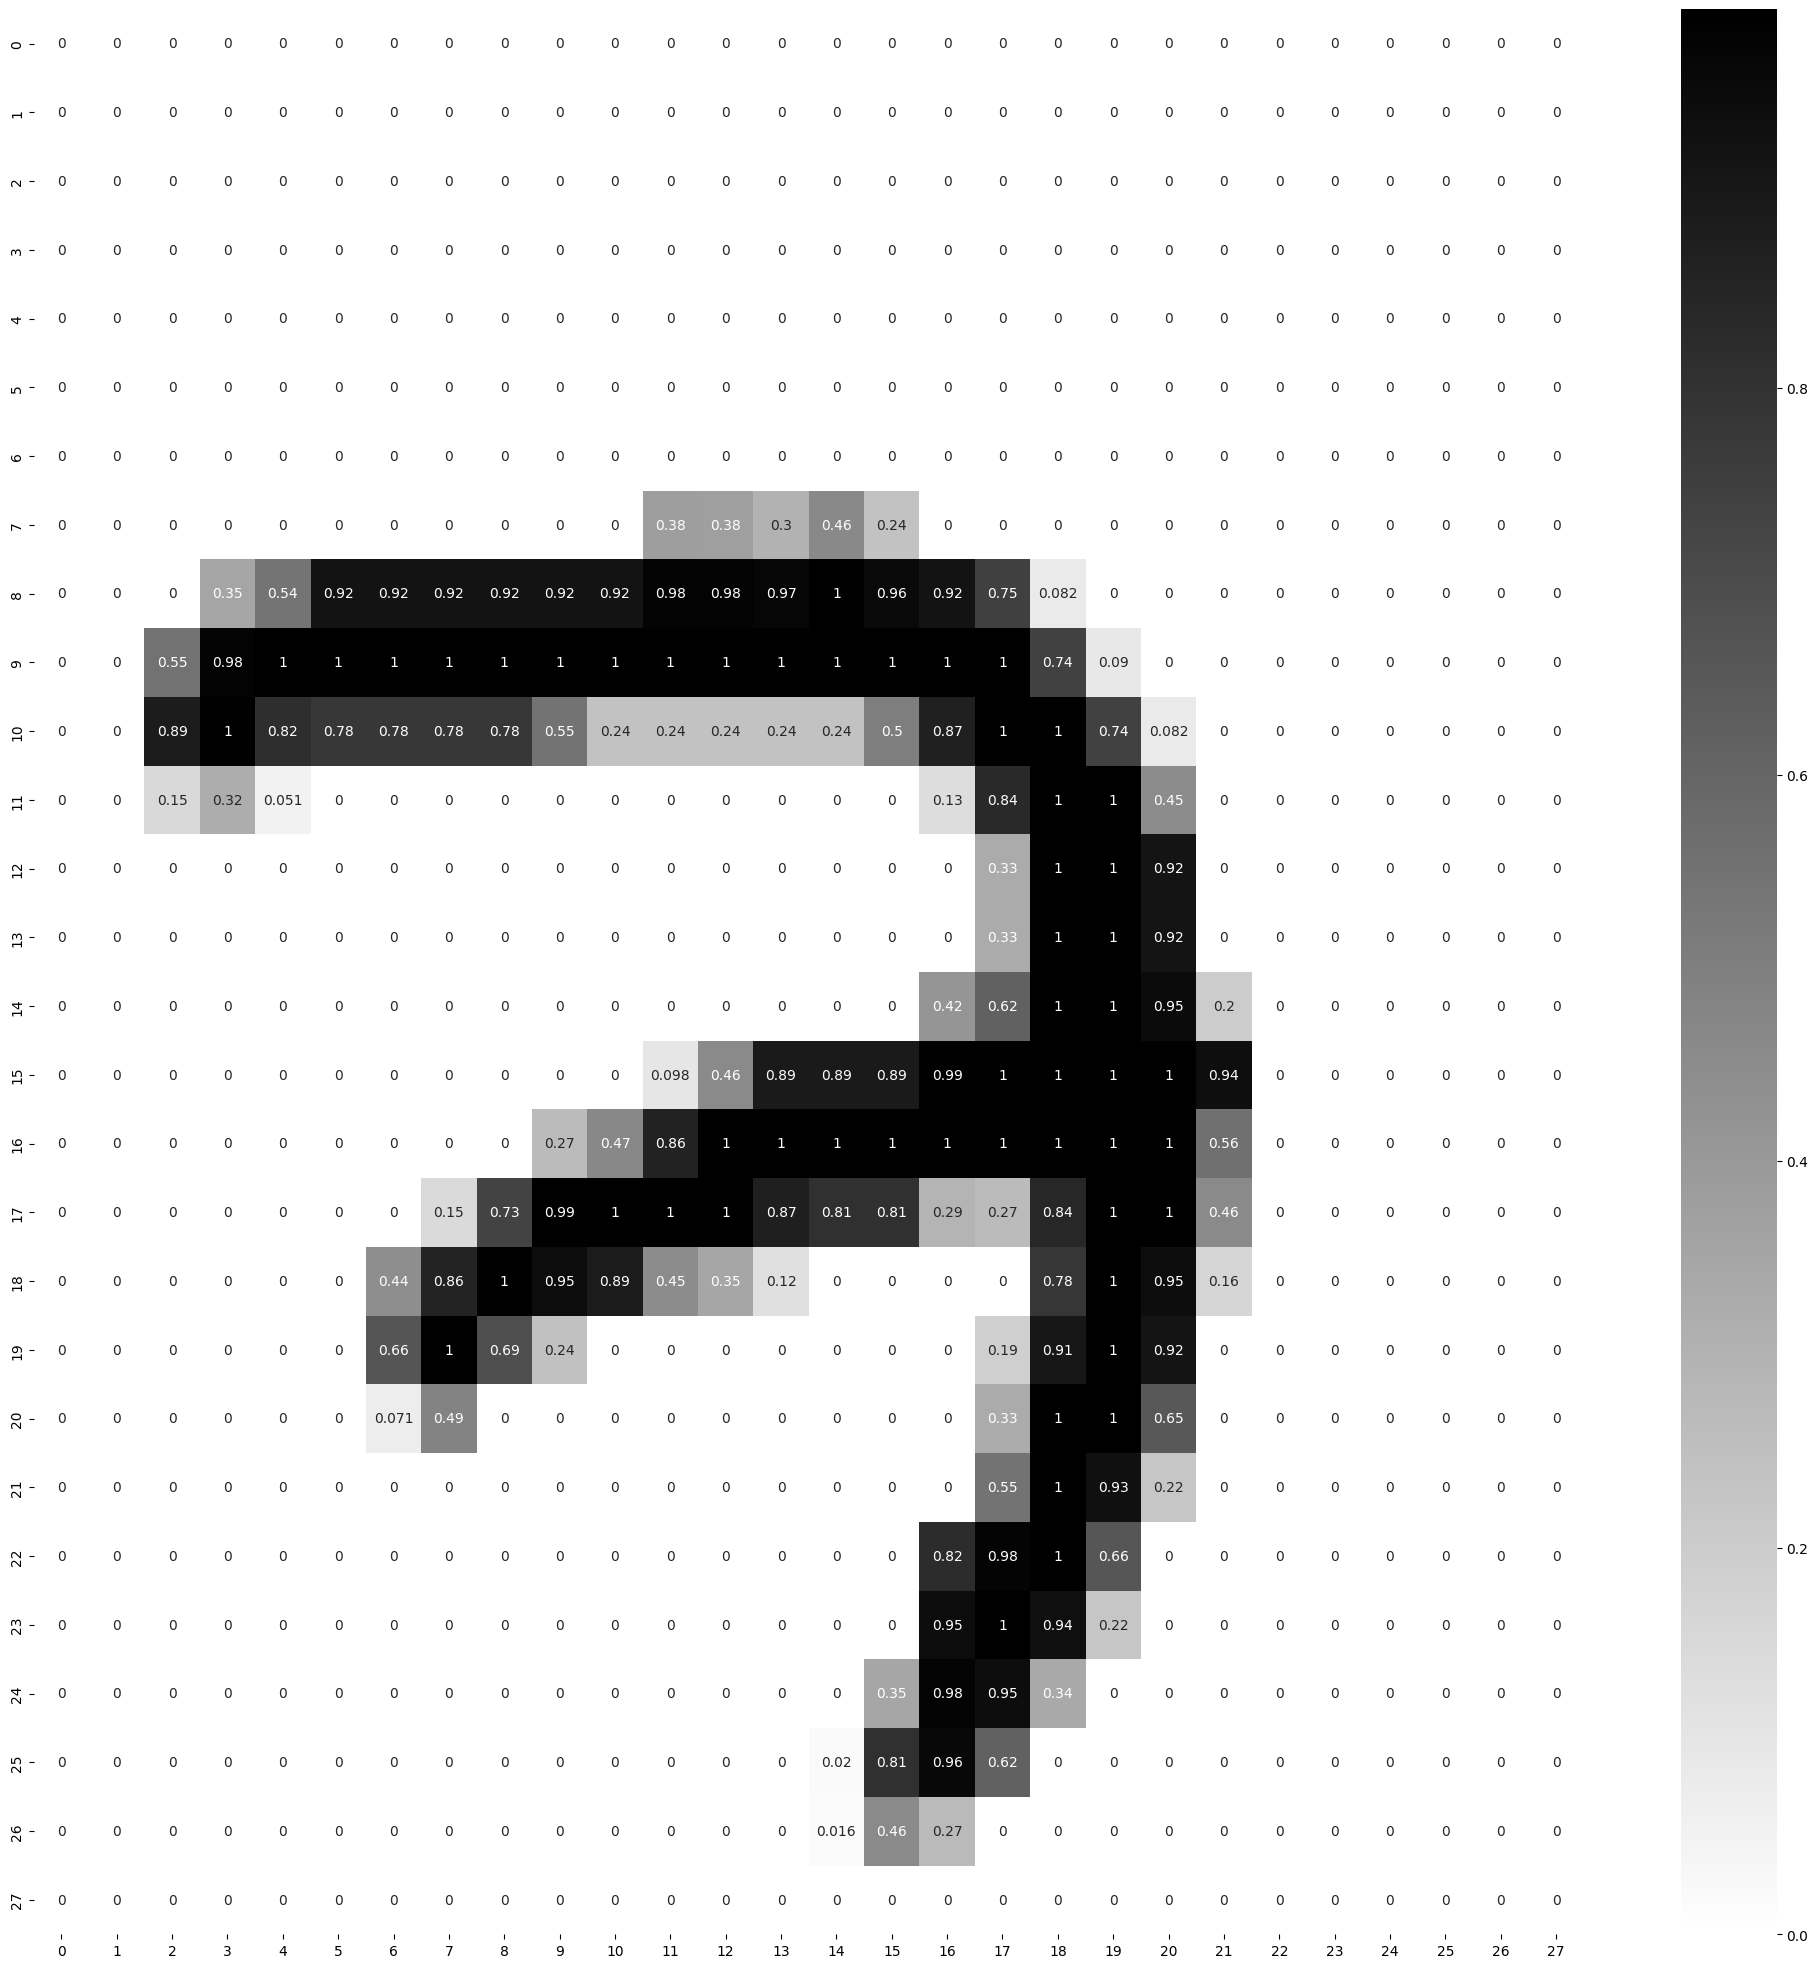

In [26]:
plt.figure(figsize=(25,25))
sns.heatmap(X_train[0],annot=True,cmap="binary")

<Axes: >

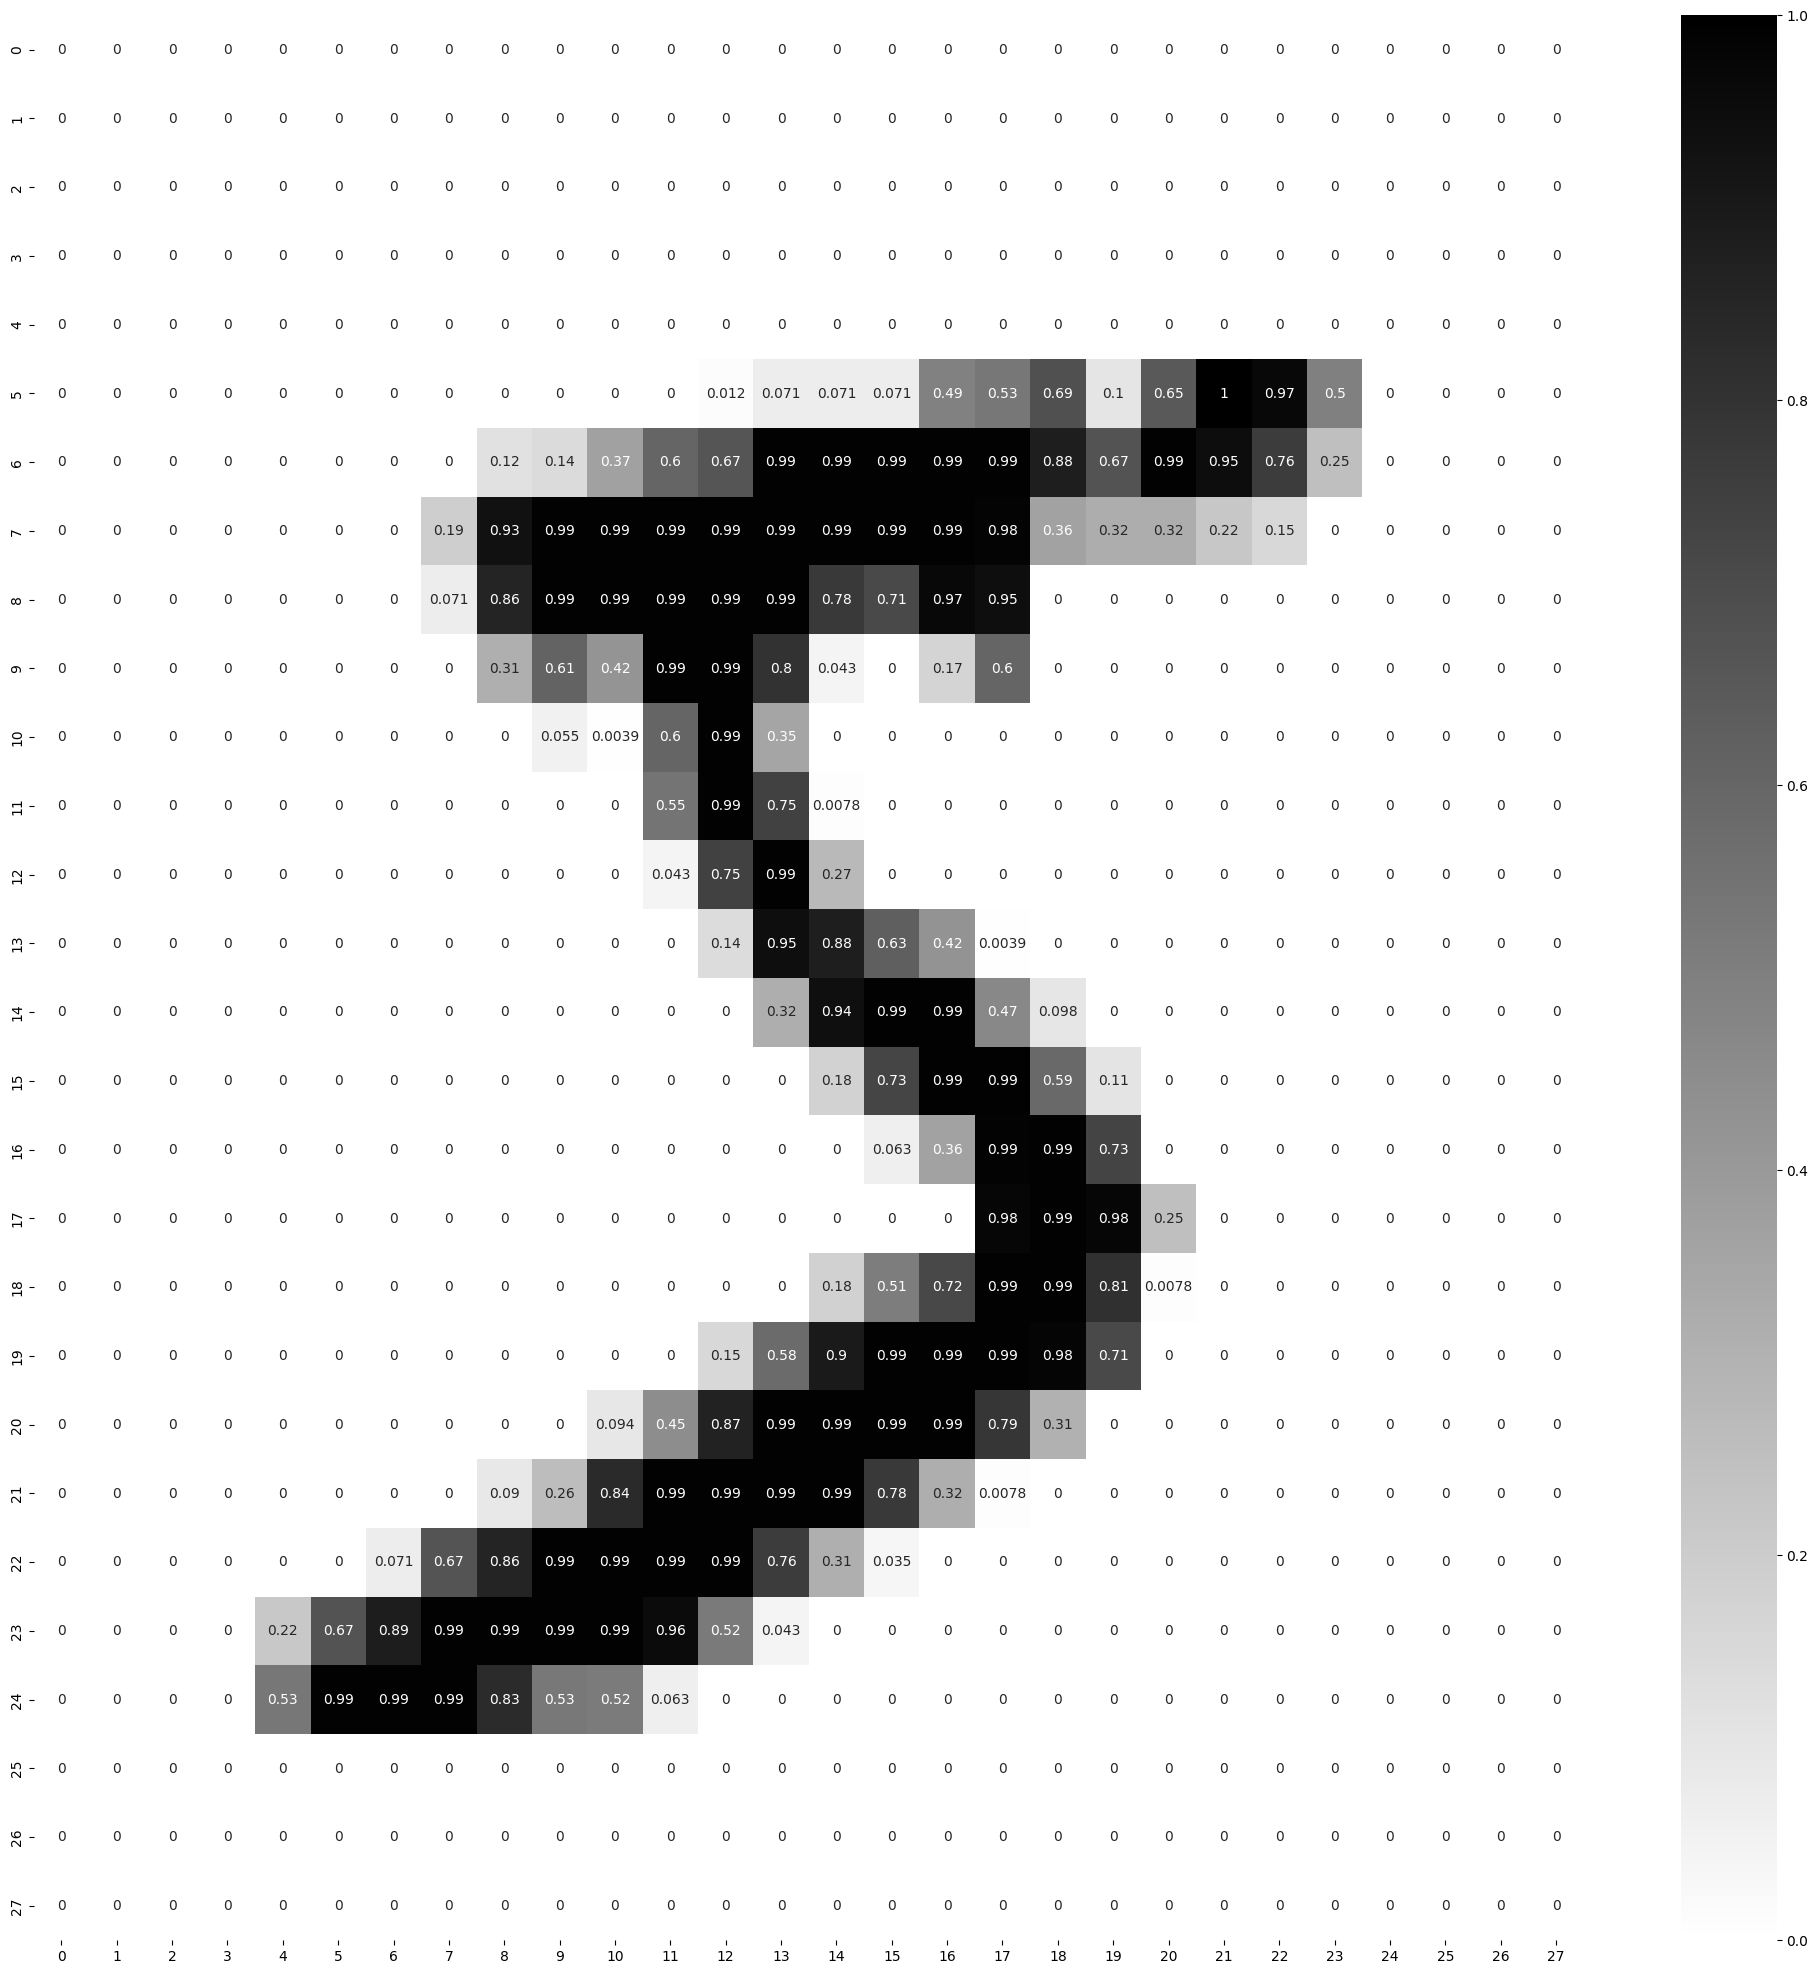

In [27]:
plt.figure(figsize=(25,25))
sns.heatmap(X_valid[0],annot=True,cmap="binary")

In [28]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

In [29]:
model_clf.layers

In [30]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
# 1st Layer
784*300+300 # firsLayer * secondLayer + bias

235500

In [32]:
# 2nd Layer
300*100+100 # secondLayer * thirdLayer + bias

30100

In [33]:
# 3rd Layer
100*10+10 # thirdLayer * fourthLayer + bias

1010

In [34]:
235500+30100+1010 #total params

266610

In [35]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [36]:
hidden1.get_weights()

[array([[ 0.06384447,  0.06604947,  0.04357664, ...,  0.07292578,
          0.03006511,  0.02617057],
        [ 0.02530092, -0.05243352,  0.04700072, ...,  0.02892891,
          0.04444061, -0.06839807],
        [ 0.01997659, -0.06691575, -0.05447543, ...,  0.05434427,
         -0.03622517,  0.05221933],
        ...,
        [-0.03179415, -0.05967351,  0.03271772, ..., -0.05331985,
          0.04805148,  0.02292012],
        [-0.03721008, -0.04040637,  0.00551035, ..., -0.06707082,
          0.04154081,  0.06683014],
        [-0.05711381, -0.01992185, -0.07047932, ..., -0.06075607,
          0.01195742, -0.04683439]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [37]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use=>tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]


model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)



# Tensorboard Callback Functions

In [42]:
# Log


import time


def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir,fileName)
  print(f"Saving logs at {logs_path}")
  return log_dir


log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit/log_2023_08_27_10_05_30


# Early Stopping Callback

In [43]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

 # Model Checkpointing Callback

In [44]:
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path,save_best_only=True)

In [46]:
# Orginal train


EPOCHS = 30

VALIDATION_SET = (X_valid,y_valid)

history= model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1216 - accuracy: 0.9657 - val_loss: 0.1221 - val_accuracy: 0.9668
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1112 - accuracy: 0.9688 - val_loss: 0.1154 - val_accuracy: 0.9700
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1019 - accuracy: 0.9710 - val_loss: 0.1092 - val_accuracy: 0.9716
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0938 - accuracy: 0.9734 - val_loss: 0.1025 - val_accuracy: 0.9730
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0873 - accuracy: 0.9754 - val_loss: 0.1009 - val_accuracy: 0.9734
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0805 - accuracy: 0.9777 - val_loss: 0.0959 - val_accuracy: 0.9750
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0750 - accuracy: 0.9793 - val_loss: 0.0933 - val_accuracy:

In [47]:
# Checkpoint training

#loading Checkpoint model
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )


Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0201 - accuracy: 0.9963 - val_loss: 0.0688 - val_accuracy: 0.9810
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0191 - accuracy: 0.9967 - val_loss: 0.0686 - val_accuracy: 0.9806
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0180 - accuracy: 0.9970 - val_loss: 0.0689 - val_accuracy: 0.9804
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0173 - accuracy: 0.9972 - val_loss: 0.0700 - val_accuracy: 0.9798
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0163 - accuracy: 0.9976 - val_loss: 0.0691 - val_accuracy: 0.9802
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0155 - accuracy: 0.9977 - val_loss: 0.0707 - val_accuracy: 0.9804
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0147 - accuracy: 0.9978 - val_loss: 0.0689 - val_accuracy:

# Saving Model

In [48]:
import time
import os

def save_model_path(MODEL_dir = "TRAINED_MODEL"):
  os.makedirs(MODEL_dir, exist_ok= True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(MODEL_dir, fileName)
  print(f"Model {fileName} will be saved at {model_path}")
  return model_path

In [49]:
UNIQUE_PATH = save_model_path()
UNIQUE_PATH

Model Model_2023_08_27_10_31_35_.h5 will be saved at TRAINED_MODEL/Model_2023_08_27_10_31_35_.h5


'TRAINED_MODEL/Model_2023_08_27_10_31_35_.h5'

In [50]:
tf.keras.models.save_model(model_clf,UNIQUE_PATH)

In [51]:
import pandas as pd

pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.020139,0.996273,0.068788,0.9810
1,0.019120,0.996745,0.068611,0.9806
2,0.018040,0.997018,0.068860,0.9804
3,0.017259,0.997218,0.070036,0.9798
4,0.016305,0.997582,0.069109,0.9802
5,0.015510,0.997745,0.070714,0.9804
6,0.014741,0.997782,0.068923,0.9812


<Axes: >

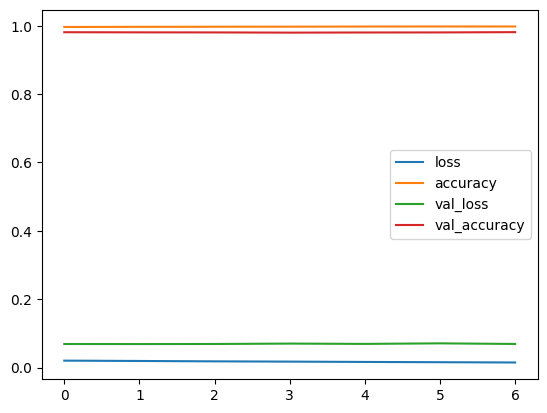

In [52]:
pd.DataFrame(history.history).plot()

# Load Tensorboard

In [57]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [58]:
%tensorboard --logdir logs/fit

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-08-27 10:46:01.145887: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

In [59]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0704 - accuracy: 0.9792


[0.07041484117507935, 0.979200005531311]

In [60]:
x_new = X_test[:3]

In [61]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

In [62]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 [==============================] - 0s 76ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [63]:
y_pred = np.argmax(y_prob ,axis = -1)
y_pred

array([7, 2, 1])

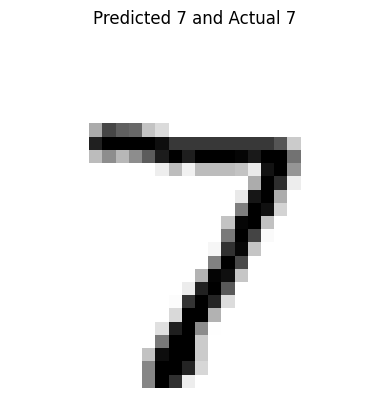

######################


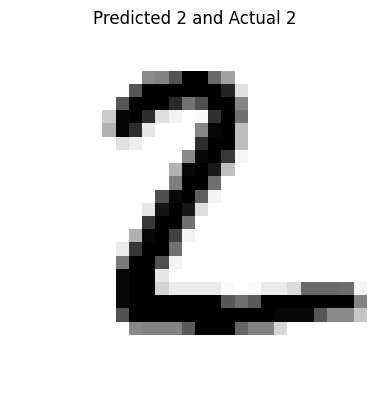

######################


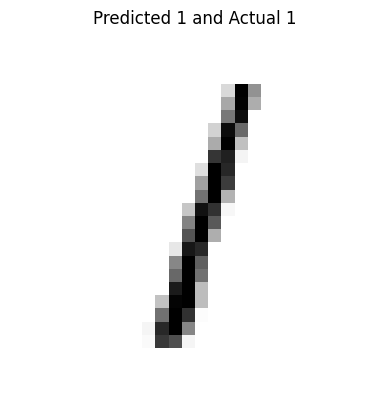

######################


In [64]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")

# Loading The Model

In [65]:
os.listdir("TRAINED_MODEL")

['Model_2023_08_27_10_31_35_.h5']

In [68]:
path_name_model = "TRAINED_MODEL/Model_2023_08_27_10_31_35_.h5"
loaded_model = tf.keras.models.load_model(path_name_model)
loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9792


[0.07041484117507935, 0.979200005531311]

In [69]:
predict = loaded_model.predict(x_new)
classes = np.argmax(predict,axis=1)

1/1 [==============================] - 0s 51ms/step


In [70]:
classes

array([7, 2, 1])